<a href="https://colab.research.google.com/github/jwoo13/Computer1/blob/main/202120992_%EB%B0%95%EC%A0%95%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [7]:
from google.colab import files
uploaded = files.upload()

Saving LENNA512.raw to LENNA512 (1).raw


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

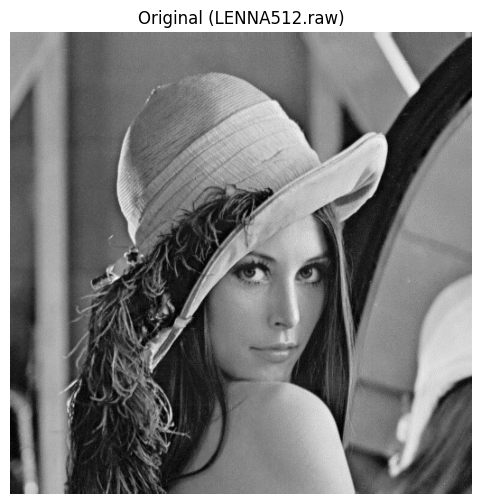

In [8]:
import numpy as np
import matplotlib.pyplot as plt

file_name = list(uploaded.keys())[0]  # 업로드된 파일명

# RAW는 헤더 없이 순수 바이트 → 8bit grayscale 기준
image = np.fromfile(file_name, dtype=np.uint8)

# reshape (LENNA512.raw 은 512 × 512)
image = image.reshape((512, 512))

plt.figure(figsize=(6,6))
plt.title("Original (LENNA512.raw)")
plt.imshow(image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

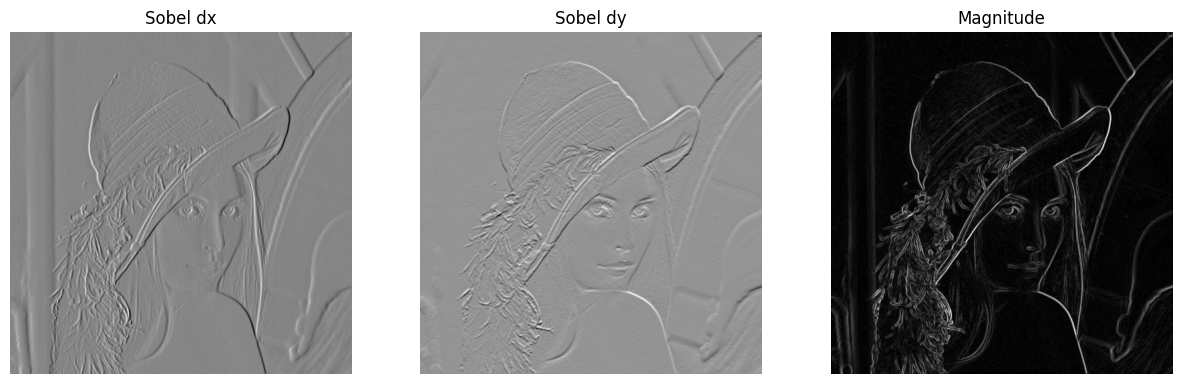

In [9]:
import cv2

dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(dx**2 + dy**2)
direction = np.arctan2(dy, dx)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title("Sobel dx"); plt.imshow(dx, cmap='gray'); plt.axis('off')
plt.subplot(1,3,2); plt.title("Sobel dy"); plt.imshow(dy, cmap='gray'); plt.axis('off')
plt.subplot(1,3,3); plt.title("Magnitude"); plt.imshow(magnitude, cmap='gray'); plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

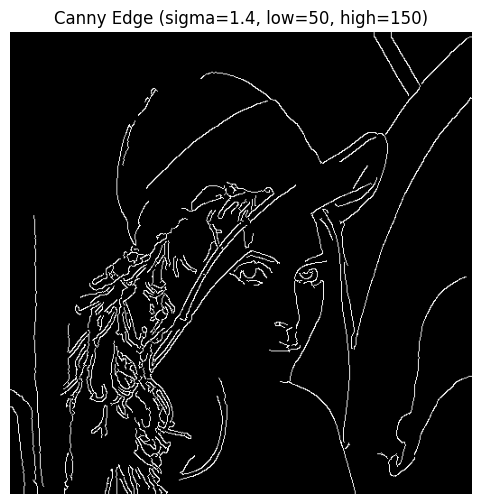

In [10]:
sigma = 1.4
Tlow = 50
Thigh = 150

blur = cv2.GaussianBlur(image, (5,5), sigma)
edges = cv2.Canny(blur, Tlow, Thigh)

plt.figure(figsize=(6,6))
plt.title(f"Canny Edge (sigma={sigma}, low={Tlow}, high={Thigh})")
plt.imshow(edges, cmap='gray')
plt.axis('off')

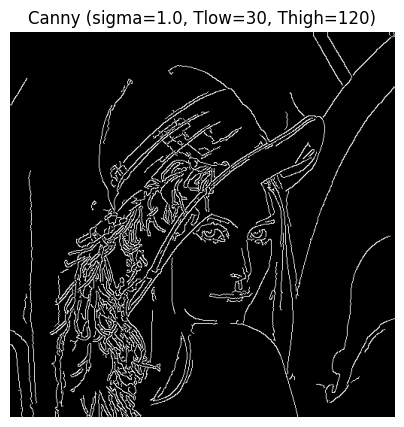

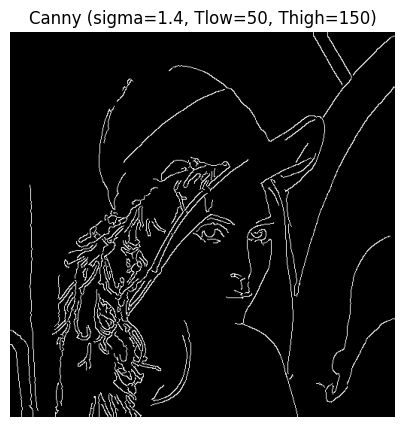

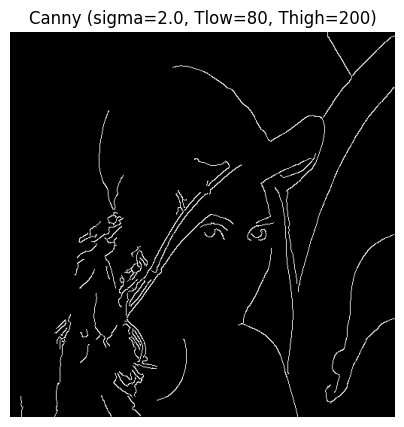

In [11]:
def canny_show(sigma, t1, t2):
    blur = cv2.GaussianBlur(image, (5,5), sigma)
    e = cv2.Canny(blur, t1, t2)

    plt.figure(figsize=(5,5))
    plt.title(f"Canny (sigma={sigma}, Tlow={t1}, Thigh={t2})")
    plt.imshow(e, cmap='gray')
    plt.axis('off')

canny_show(1.0, 30, 120)
canny_show(1.4, 50, 150)
canny_show(2.0, 80, 200)